In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [8]:
#data generate
num_data = 2400
x1 = np.random.rand(num_data)*10
x2 = np.random.rand(num_data)*10
e = np.random.normal(0, 0.5, num_data) #평균이 0이고 표준편차가 0.5인 2400개 수
X=np.array([x1, x2]).T #행과 열을 바꿔준다.
y=2*np.sin(x1) + np.log(0.5*x2**2) + e
print(X.shape, y.shape)

(2400, 2) (2400,)


In [98]:
#split data into train, validation, test
train_X, train_y = X[:1600, :], y[:1600]
val_x, val_y = X[1600:2000, :], y[1600:2000]
test_X, test_y = X[2000:, :], y[2000:]

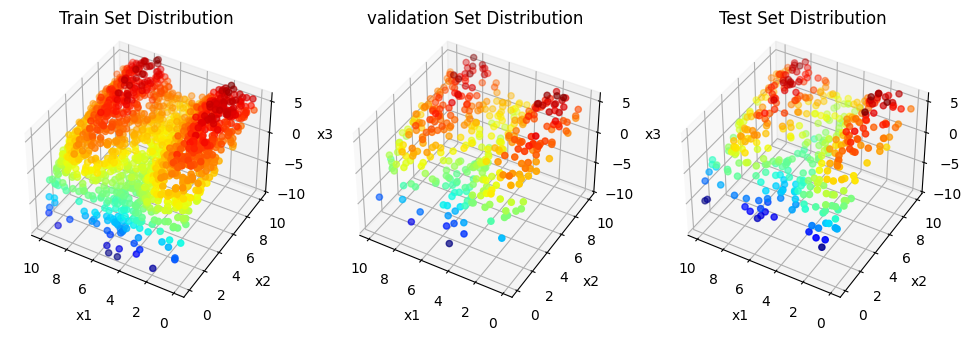

In [28]:
#visualize dataset
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(train_X[:, 0], train_X[:, 1], train_y, c=train_y, cmap='jet')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('x3')
ax1.set_title('Train Set Distribution')
ax1.set_zlim(-10, 6)
ax1.view_init(40, -60)
ax1.invert_xaxis()

ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(val_x[:, 0], val_x[:, 1], val_y, c=val_y, cmap='jet')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('x3')
ax2.set_title('validation Set Distribution')
ax2.set_zlim(-10, 6)
ax2.view_init(40, -60)
ax2.invert_xaxis()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(test_x[:, 0], test_x[:, 1], test_y, c=test_y, cmap='jet')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('x3')
ax3.set_title('Test Set Distribution')
ax3.set_zlim(-10, 6)
ax3.view_init(40, -60)
ax3.invert_xaxis()

plt.show()

In [30]:
#Hypothesis Define (Model Define)
import torch
import torch.nn as nn

#기본 신경망 클래스인 nn.module을 상속받는다
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=1, bias=True)

    # 인스턴스(샘플) x가 인풋으로 들어왔을 때 모델이 예측하는 y값을 리턴합니다.
    def forward(self, x):
        return self.linear(x)

In [35]:
lm = LinearModel()
print(lm.linear.weight, lm.linear.bias)

Parameter containing:
tensor([[ 0.5663, -0.4860]], requires_grad=True) Parameter containing:
tensor([-0.3551], requires_grad=True)


In [39]:
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x


In [43]:
mlpm = MLPModel()
mlpm.forward(torch.Tensor(train_X[0]))

tensor([-2.3330], grad_fn=<ViewBackward0>)

In [46]:
#loss function
reg_loss = nn.MSELoss()
"""
test_pred_y = torch.Tensor([0,0,0,0])
test_true_y = torch.Tensor([0,1,0,1])

print(reg_loss(test_pred_y, test_true_y))
print(reg_loss(test_true_y, test_true_y))
"""

'\ntest_pred_y = torch.Tensor([0,0,0,0])\ntest_true_y = torch.Tensor([0,1,0,1])\n\nprint(reg_loss(test_pred_y, test_true_y))\nprint(reg_loss(test_true_y, test_true_y))\n'

801 parameters


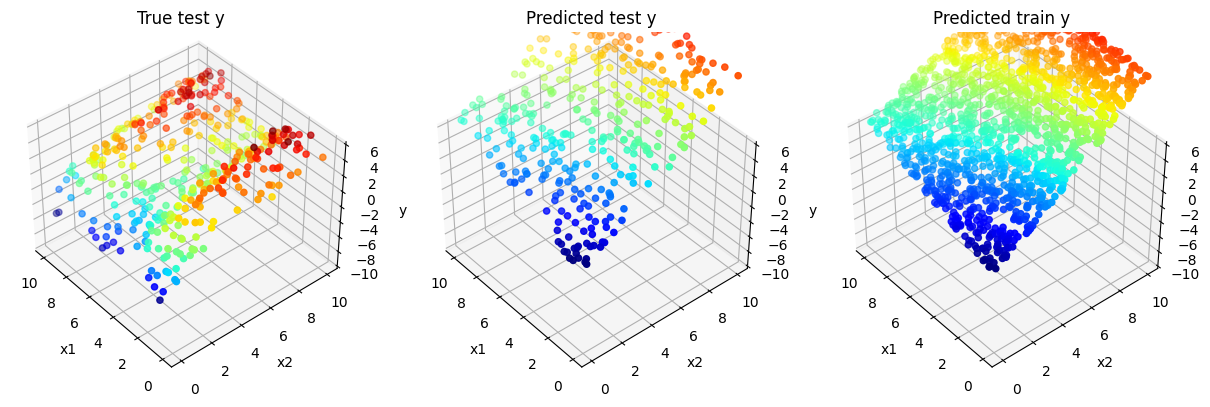

0 tensor(55.4528, grad_fn=<MseLossBackward0>)


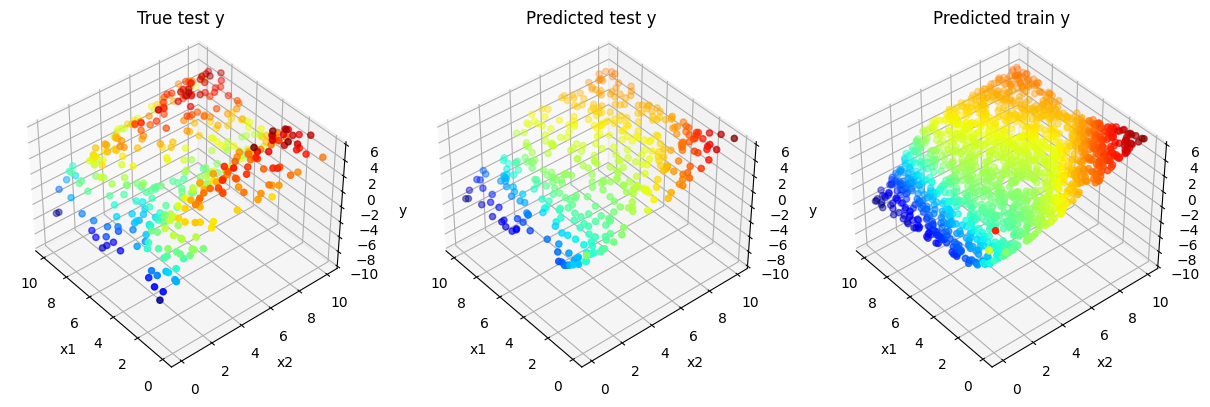

200 tensor(2.1557, grad_fn=<MseLossBackward0>)


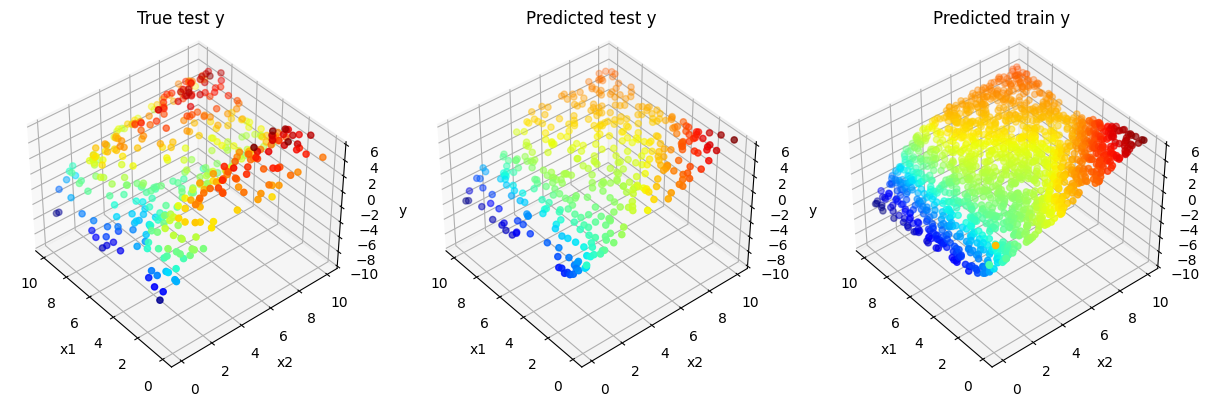

400 tensor(1.9653, grad_fn=<MseLossBackward0>)


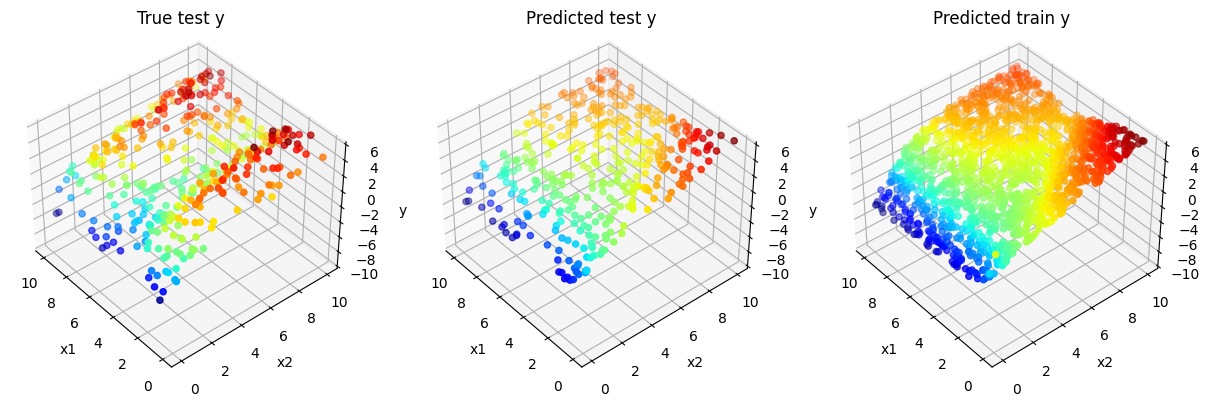

600 tensor(1.8130, grad_fn=<MseLossBackward0>)


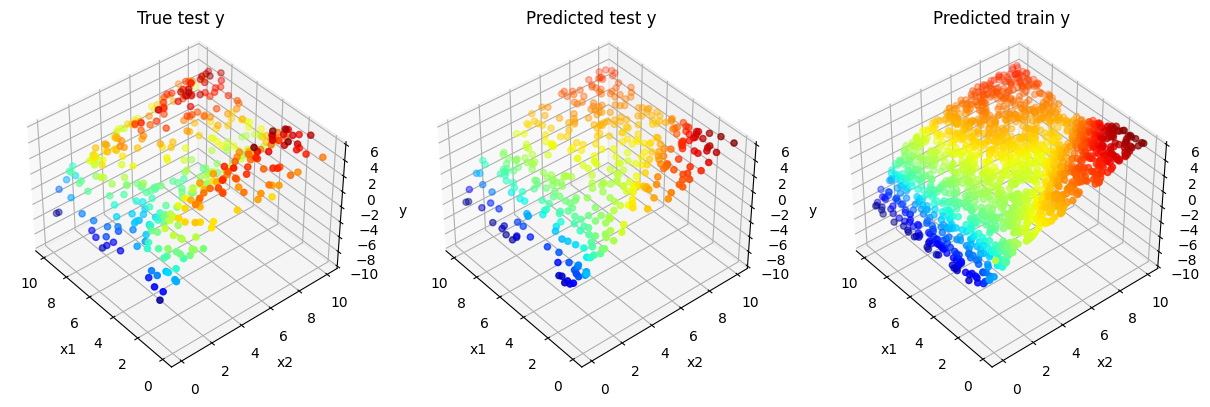

800 tensor(1.6899, grad_fn=<MseLossBackward0>)


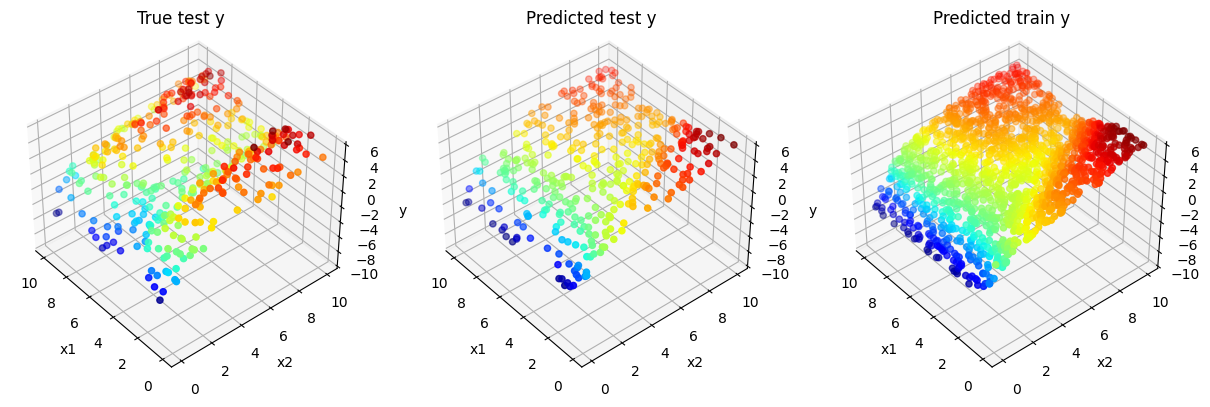

1000 tensor(1.5983, grad_fn=<MseLossBackward0>)


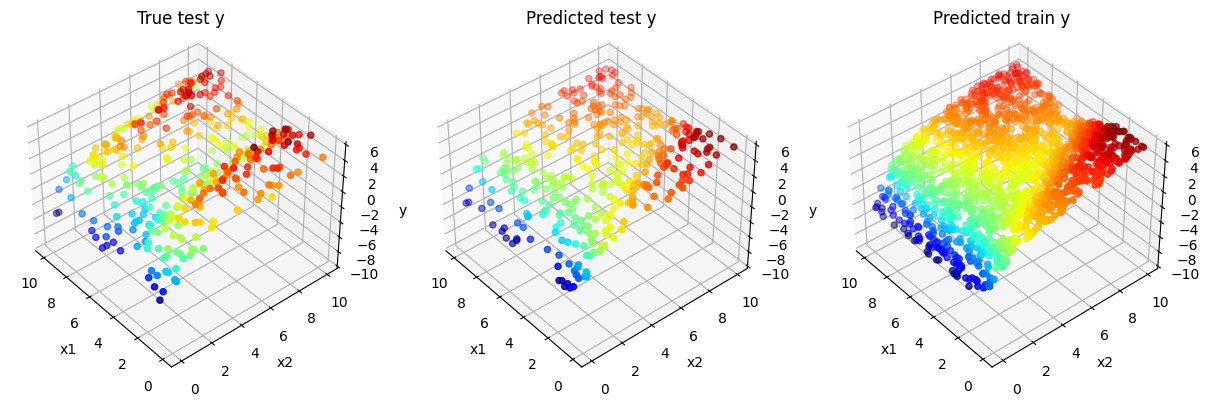

1200 tensor(1.5245, grad_fn=<MseLossBackward0>)


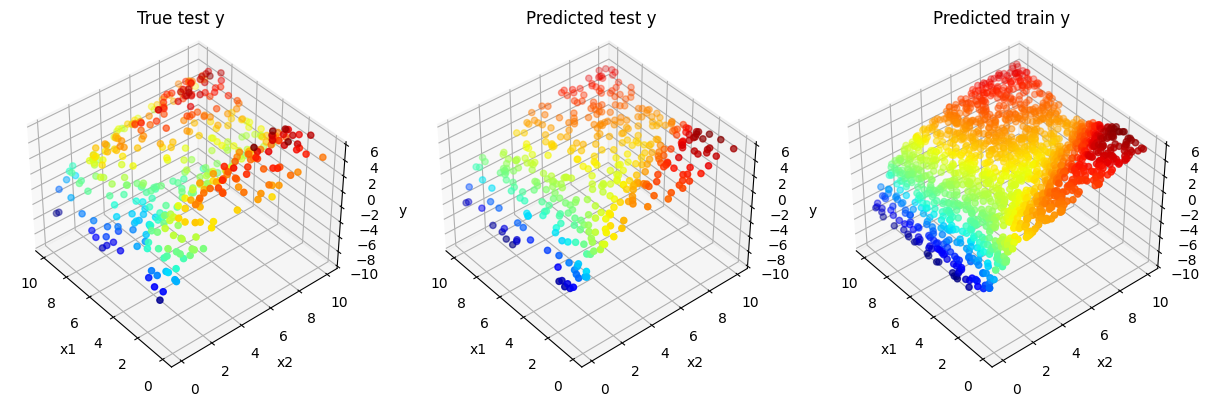

1400 tensor(1.4531, grad_fn=<MseLossBackward0>)


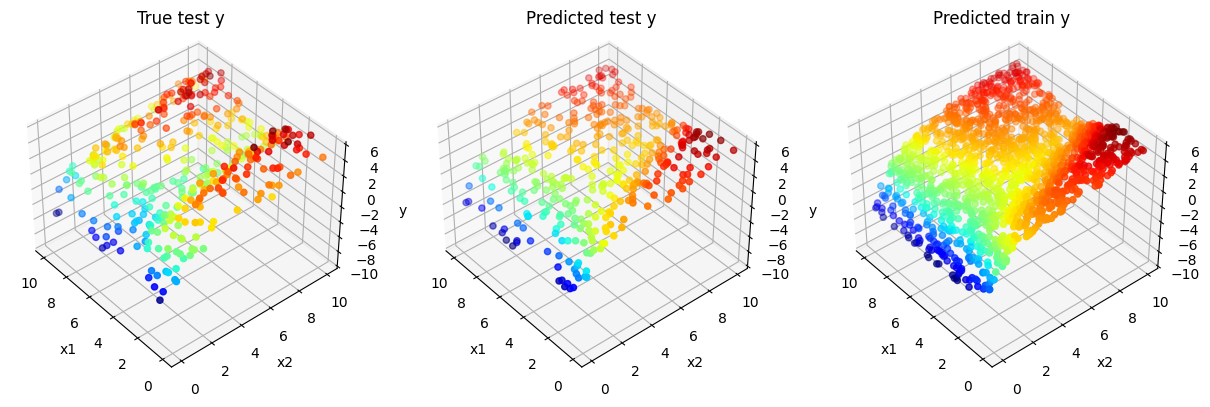

1600 tensor(1.3876, grad_fn=<MseLossBackward0>)


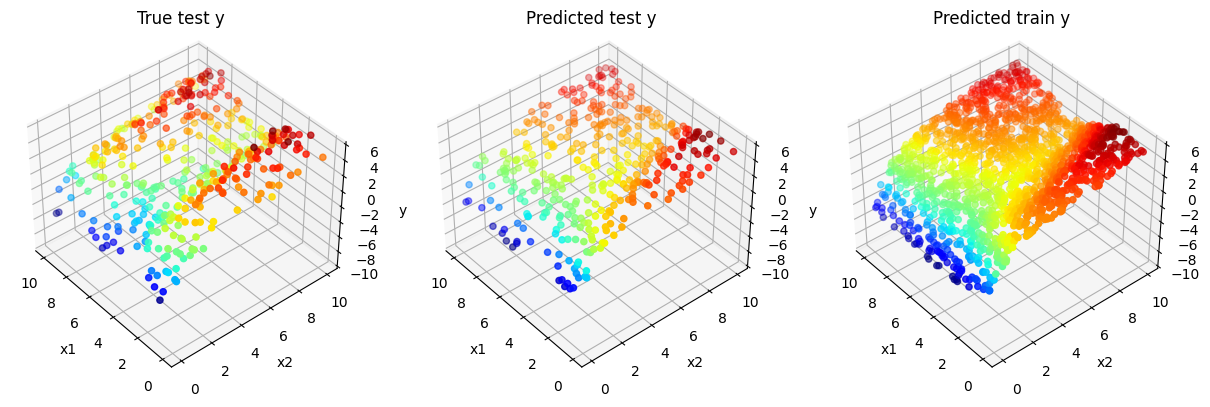

1800 tensor(1.3310, grad_fn=<MseLossBackward0>)


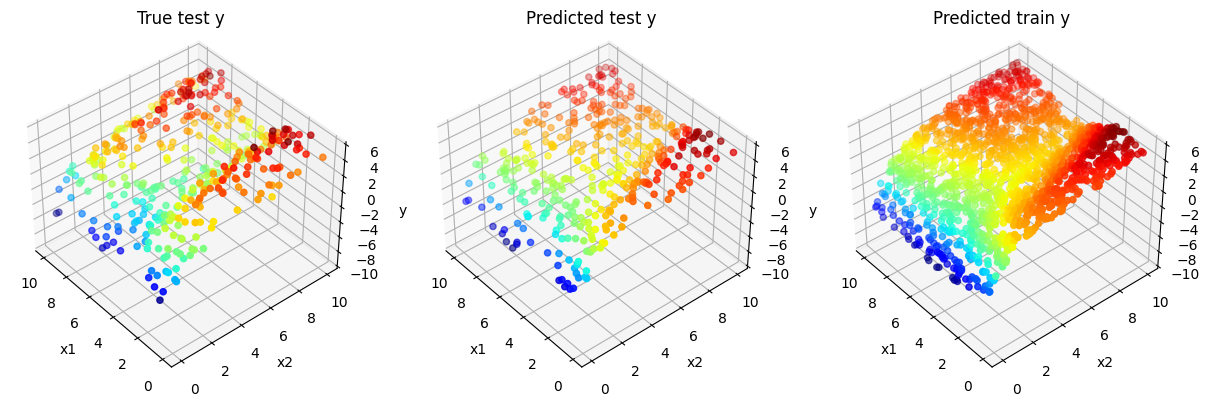

2000 tensor(1.2845, grad_fn=<MseLossBackward0>)


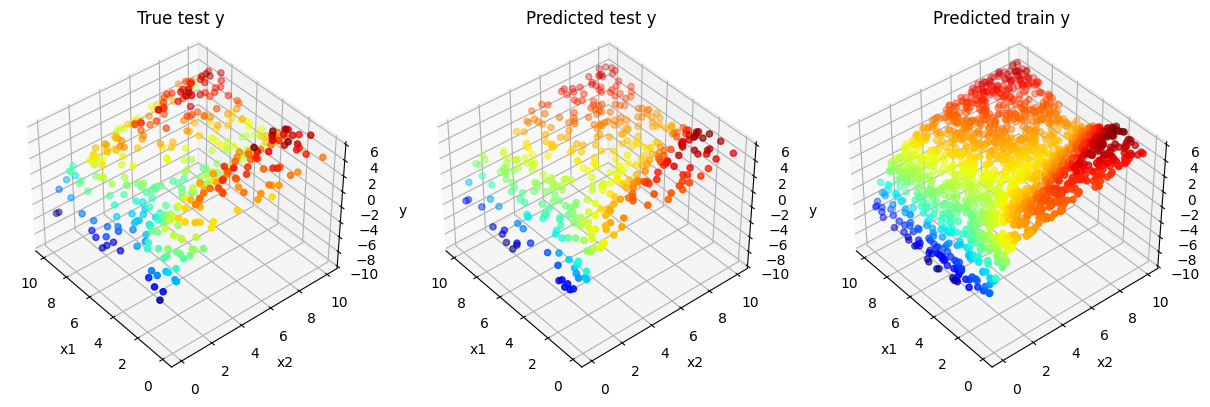

2200 tensor(1.2492, grad_fn=<MseLossBackward0>)


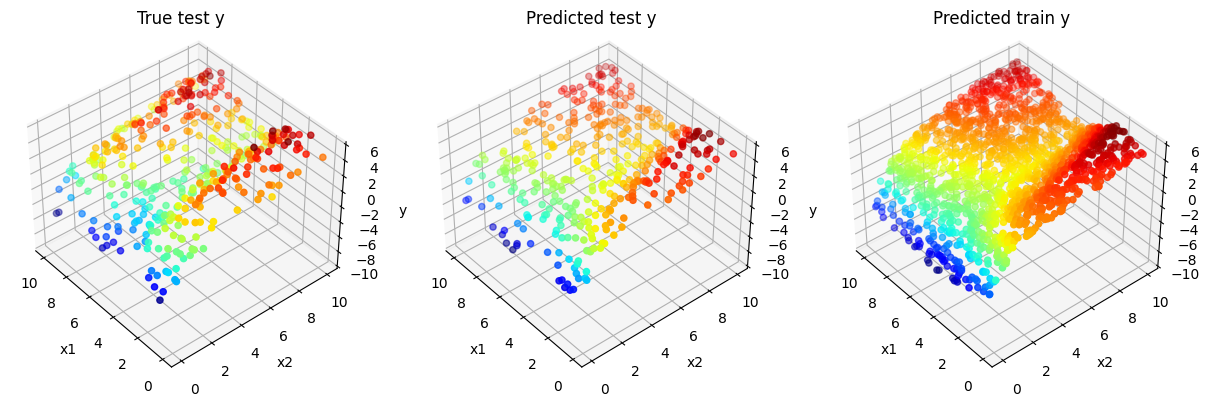

2400 tensor(1.2216, grad_fn=<MseLossBackward0>)


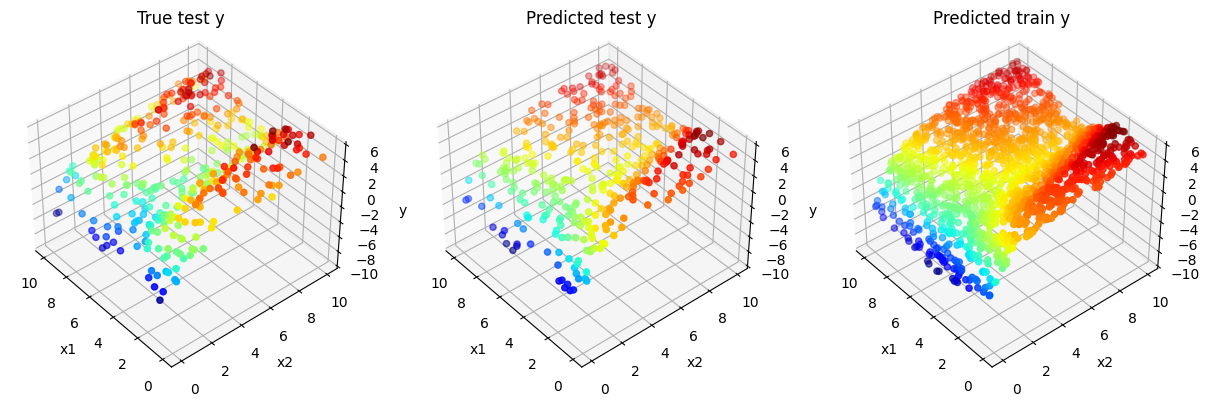

2600 tensor(1.1982, grad_fn=<MseLossBackward0>)


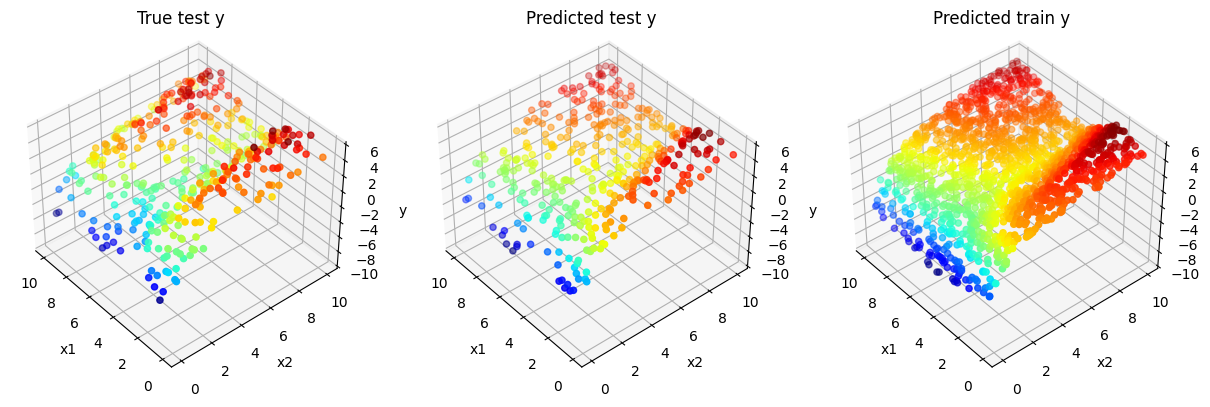

2800 tensor(1.1787, grad_fn=<MseLossBackward0>)


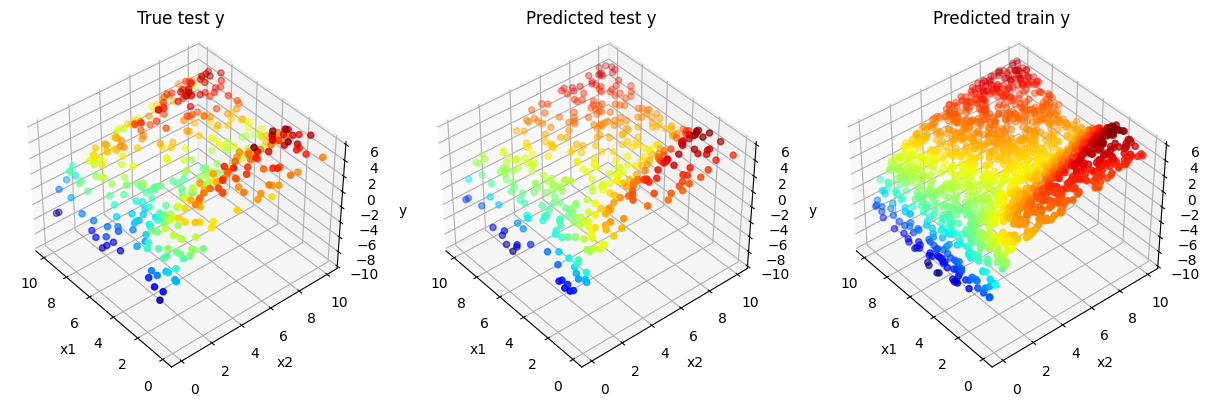

3000 tensor(1.1612, grad_fn=<MseLossBackward0>)


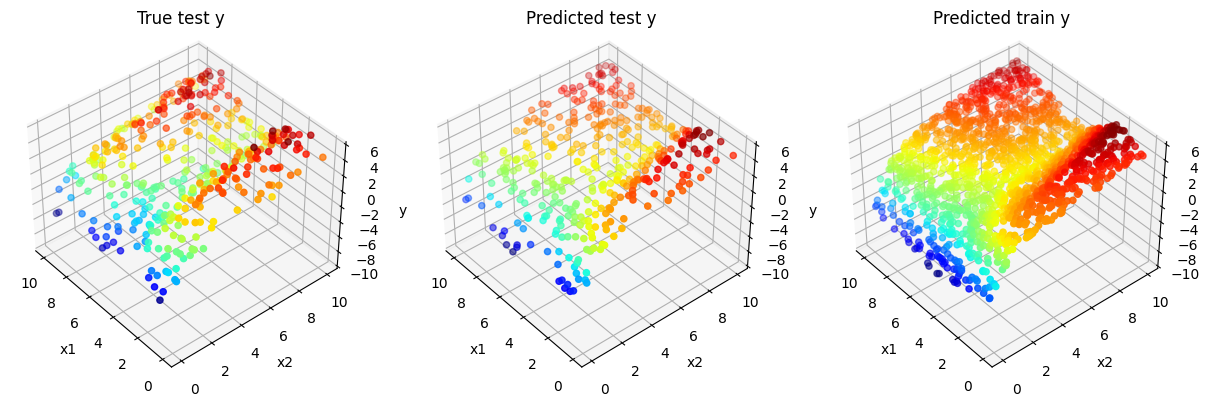

3200 tensor(1.1443, grad_fn=<MseLossBackward0>)


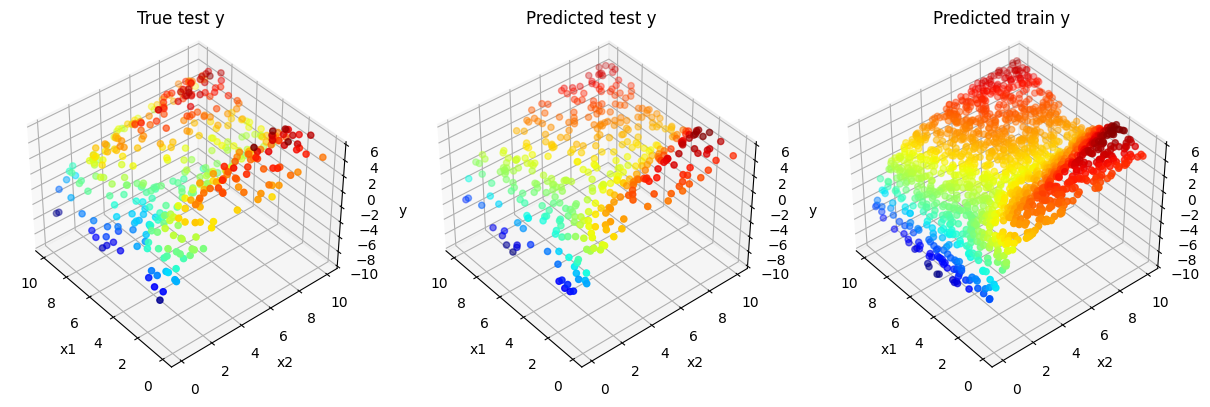

3400 tensor(1.1293, grad_fn=<MseLossBackward0>)


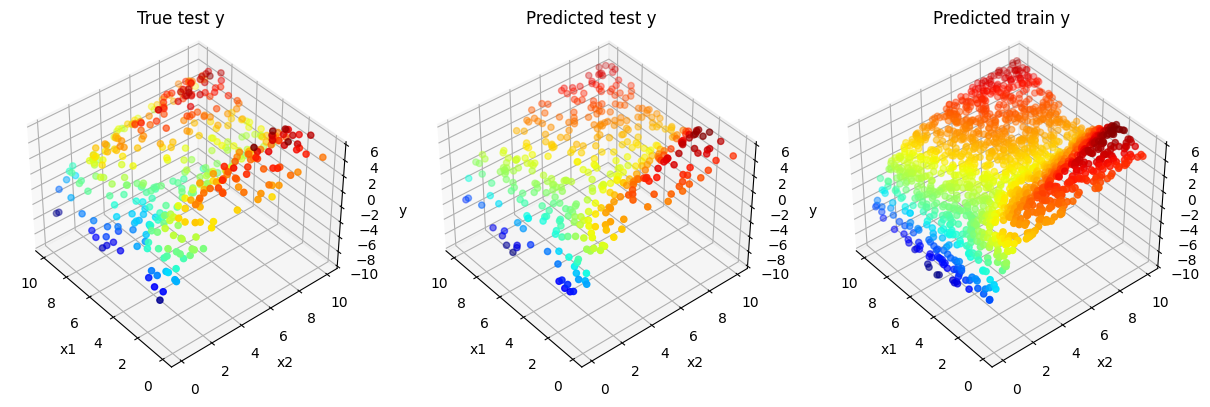

3600 tensor(1.1143, grad_fn=<MseLossBackward0>)


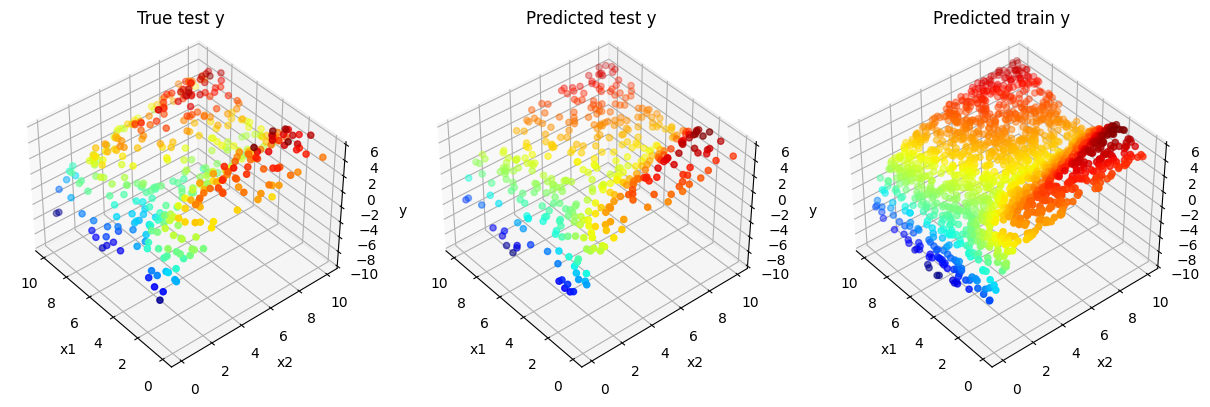

3800 tensor(1.1013, grad_fn=<MseLossBackward0>)


In [99]:
import torch.optim as optim
from sklearn.metrics import mean_absolute_error

#model = LinearModel()
model=MLPModel()
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))
lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

train_lossses = []
validation_losses = []
list_mae = []
list_mae_epoch = []

epoch = 4000
for i in range(epoch):
    #train
    model.train()
    optimizer.zero_grad()

    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y)
    pred_y = model.forward(input_x)

    loss = reg_loss(pred_y.squeeze(), true_y)
    loss.backward()
    optimizer.step()
    train_lossses.append(loss.item())

    #validate
    model.eval()
    optimizer.zero_grad()

    input_x = torch.Tensor(val_x)
    true_y = torch.Tensor(val_y)
    pred_y = model.forward(input_x)

    loss = reg_loss(pred_y.squeeze(), true_y)
    validation_losses.append(loss.item())

        # ====== Evaluation ======= #
    if i % 200 == 0: # 200회의 학습마다 실제 데이터 분포와 모델이 예측한 분포를 그려봅니다.
        
        # ====== Calculate MAE ====== #
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().numpy() 
        mae = mean_absolute_error(true_y, pred_y) # sklearn 쪽 함수들은 true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것에 주의합시다
        list_mae.append(mae)
        list_mae_epoch.append(i)
        
        fig = plt.figure(figsize=(15,5))
        
        # ====== True Y Scattering ====== #
        ax1 = fig.add_subplot(1, 3, 1, projection='3d')
        ax1.scatter(test_X[:, 0], test_X[:, 1], test_y, c=test_y, cmap='jet')
        
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_zlabel('y')
        ax1.set_zlim(-10, 6)
        ax1.view_init(40, -40)
        ax1.set_title('True test y')
        ax1.invert_xaxis()

        # ====== Predicted Y Scattering ====== #
        ax2 = fig.add_subplot(1, 3, 2, projection='3d')
        ax2.scatter(test_X[:, 0], test_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_zlabel('y')
        ax2.set_zlim(-10, 6)
        ax2.view_init(40, -40)
        ax2.set_title('Predicted test y')
        ax2.invert_xaxis()

        # ====== Just for Visualizaing with High Resolution ====== #
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3, projection='3d')
        ax3.scatter(train_X[:, 0], train_X[:, 1], pred_y, c=pred_y[:,0], cmap='jet')

        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_zlabel('y')
        ax3.set_zlim(-10, 6)
        ax3.view_init(40, -40)
        ax3.set_title('Predicted train y')
        ax3.invert_xaxis()
        
        plt.show()
        print(i, loss)

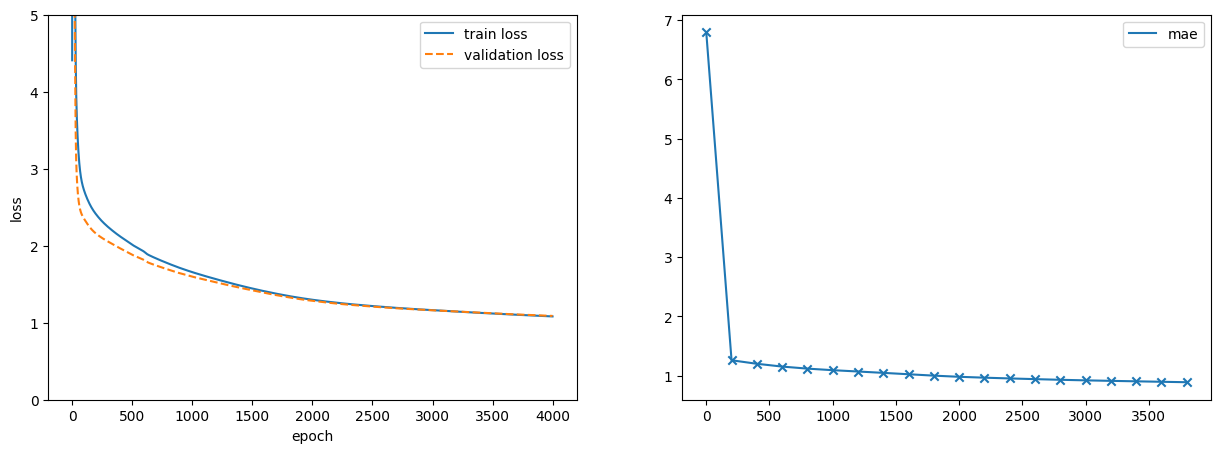

In [104]:
fig = plt.figure(figsize=(15,5))
axis1 = fig.add_subplot(1, 2, 1)
axis1.plot((range(len(train_lossses))) ,train_lossses, label='train loss')
axis1.plot((range(len(validation_losses))) ,validation_losses, '--', label='validation loss')
axis1.set_ylim(0, 5)
axis1.set_xlabel('epoch')
axis1.set_ylabel('loss')
axis1.legend()

axis2 = fig.add_subplot(1, 2, 2)
axis2.plot(list_mae_epoch, list_mae, label = 'mae')
axis2.scatter(list_mae_epoch, list_mae, marker='x')
axis2.legend()
plt.show()